In [134]:
import pandas as pd
from pandas import  DataFrame, Series

import re

import matplotlib.pyplot as plt
%matplotlib inline

In [218]:
titanic_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")

In [219]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [220]:
train_df = titanic_df
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [235]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"Braund,",0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"Cumings,",1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"Heikkinen,",0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"Futrelle,",0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"Allen,",0.0,0.0,1.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,"Moran,",0.0,1.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,"McCarthy,",0.0,0.0,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,"Palsson,",0.0,0.0,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,"Johnson,",0.0,0.0,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,"Nasser,",1.0,0.0,0.0


In [222]:
train_df["Initial"] = train_df.Name.str.extract(', ([A-Z]*[a-z]*).', expand=True)

In [224]:
train_df.Initial.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Lady          1
Mme           1
Sir           1
Jonkheer      1
the           1
Capt          1
Ms            1
Name: Initial, dtype: int64

In [227]:
train_df["LastName"] = train_df.Name.str.extract('(.*, )', expand=True)
# These may be same family members with common last name
train_df.LastName.value_counts()

Andersson,                  9
Sage,                       7
Goodwin,                    6
Skoog,                      6
Panula,                     6
Johnson,                    6
Carter,                     6
Rice,                       5
Asplund,                    4
Ford,                       4
Fortune,                    4
Brown,                      4
Gustafsson,                 4
Smith,                      4
Harris,                     4
Baclini,                    4
Hart,                       4
Williams,                   4
Palsson,                    4
Kelly,                      4
Lefebre,                    4
Harper,                     4
Graham,                     3
Collyer,                    3
Allison,                    3
Davies,                     3
Jensen,                     3
Newell,                     3
Meyer,                      3
O'Brien,                    3
                           ..
McGovern,                   1
Lurette,                    1
Barah,    

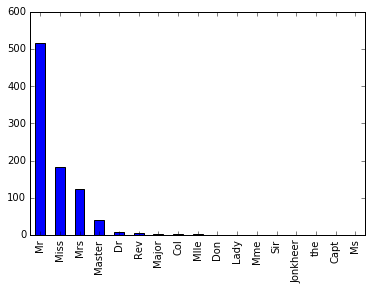

In [228]:
Initial_df = train_df.Initial.value_counts()
Initial_df.plot(kind='bar')

In [210]:
# train_df = train_df.drop(["PassengerId","Name","Ticket"], axis=1)
# train_df = train_df.drop(["LastName, FirstName"], axis=1)

In [230]:
train_df["Embarked"] = train_df["Embarked"].fillna("S")

In [232]:
embark_dummies  = pd.get_dummies(train_df['Embarked'])
train_df = train_df.join(embark_dummies)

In [236]:
train_df = train_df.drop(["Embarked"], axis=1)

In [237]:
train_df['Gender'] = 3
train_df['Gender'] = train_df['Sex'].map({'female':0,'male':1}).astype(int)
train_df = train_df.drop(['Sex'],axis=1)

In [238]:
train_df["Party"] = train_df["SibSp"]+train_df["Parch"]

In [239]:
train_df = train_df.drop(["Parch","SibSp"], axis=1)

In [240]:
train_df

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,Initial,LastName,C,Q,S,Gender,Party
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,Mr,"Braund,",0.0,0.0,1.0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,Mrs,"Cumings,",1.0,0.0,0.0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,Miss,"Heikkinen,",0.0,0.0,1.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,Mrs,"Futrelle,",0.0,0.0,1.0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,Mr,"Allen,",0.0,0.0,1.0,1,0
5,6,0,3,"Moran, Mr. James",NaN,330877,8.4583,NaN,Mr,"Moran,",0.0,1.0,0.0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,17463,51.8625,E46,Mr,"McCarthy,",0.0,0.0,1.0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,349909,21.0750,NaN,Master,"Palsson,",0.0,0.0,1.0,1,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,347742,11.1333,NaN,Mrs,"Johnson,",0.0,0.0,1.0,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,237736,30.0708,NaN,Mrs,"Nasser,",1.0,0.0,0.0,0,1
